<div style="background-color:#5D73F2; color:#19180F; font-size:40px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Bagging </div>
<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Overview</div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 
Bagging (short for Bootstrap Aggregating) is a technique used in machine learning to improve the accuracy and stability of predictive models. This involves building an ensemble of several models (called base learners) and combining their predictions to produce a final prediction.<br><br>Bagging is based on the intuition to train multiple models on different subsets of the training data and compute or match their predictions to reduce variance and improve the overall performance of the ensemble model. The idea is that different models can have different errors, but when combined, these errors cancel each other out, resulting in more accurate and stable predictions.<br><br>
Here is a description of the underlying content<br>
<br><br>
1. Data Sampling: If the training data set is of size N, the bags randomly select and replace a subset of the data. This means that each subset can contain duplicate samples and can be the same size as the original data set. This sampling process is called controlled sampling.<br><br>
2. Model training: For each bootstrap, a base learner is trained on an individually selected subset. The base learner can be any machine learning algorithm that can generate predictions. B. Decision trees, neural networks or support vector machines. <br><br>
3. Prediction Ensemble: Once all base learners are trained, they are used to predict new unproven data. Depending on the type of problem, the predictions of each model can be combined with different methods.<br><br>
- Classification: the most common method is voting, choosing the class predicted by most models as the final prediction. <br><br>
- Regression: The predictions of different models are averaged to get the final prediction.<br><br>
 Mathematically, Bagging use the central limit theorem to reduce the variance of an ensemble model.<br> According to this theorem, the mean of many independent, identically distributed random variables will be Gaussian, regardless of the distribution of the original variables. With bagging, each base learner is trained on different bootstrap samples that are independent but still have the same distribution. When averaging the predictions, the overall model has less variance than the individual models.<br><br>
In addition, bagged models often provide an estimate of the model's generalization error, known as out-of-bag (OOB) error. Each base learner is trained on a subset of the data so that samples not included in the bootstrap (about 36.8% of the average data) can be used to evaluate model performance without a separate validation set. This estimate indicates how well the expected bagging model will perform on the hidden data. Overall, Bagging is a powerful machine learning technique that can be used to reduce redundancy, improve prediction accuracy, and evaluate model performance.<br></div>

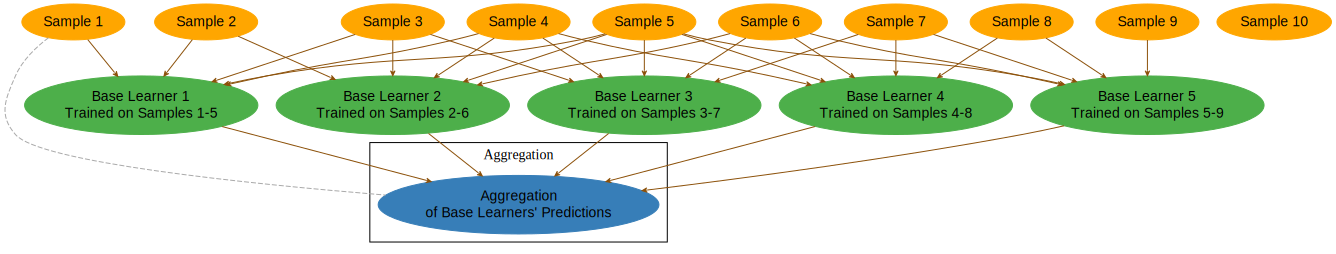

In [1]:
from IPython.display import SVG, display

# Load the SVG file and display it
svg_file = '/kaggle/input/machine-learning-architecture-diagrams/Bagging.svg'
display(SVG(filename=svg_file))

<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 
The graph above illustrates the bagging (Bootstrap Aggregating) ensemble learning method. It is a machine learning algorithm that combines multiple models to improve the accuracy & stability of predictions. The graph consists of three clusters of nodes & arrows representing the process of bagging:<br><br>
1. Bootstrap Sampling: The first cluster represents the process of sampling data with replacement to generate multiple training datasets. This is done to create diverse training sets for the base learners. The cluster contains 10 nodes, each representing a different sample of the original dataset.<br><br>
2. Base Learners: The second cluster represents the base learners that are trained on the bootstrap samples. In this case, there are five base learners, each trained on a different set of samples. The label on each node shows which samples were used to train the respective base learner.<br><br>
3. Aggregation: The third cluster represents the final step of the bagging process, where the predictions of the base learners are combined to make the final prediction. This is typically done by taking the average (or majority vote) of the predictions. The aggregation node represents this step.
The arrows in the graph represent the flow of information between the nodes. The arrows from the bootstrap samples to the base learners indicate which samples were used to train each base learner. The arrows from the base learners to the aggregation node indicate that the predictions made by each base learner are combined in the aggregation step.<br><br></div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
In this notebook, We'll be generating submission via a decision tree treated as base classifier, you can choose other to increase the LB. </div>


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Installing optuna
    </div>


In [2]:
!pip install optuna --quiet


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Importing modules
    </div>


In [3]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import optuna


/usr/local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Reading dataframes    </div>


In [4]:
train_df = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/train.csv')
test_df = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/test.csv')

In [5]:
train_df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [6]:
test_df.columns

Index(['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 1. Data Preprocessing </div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Removing irrelevant columns    </div>


In [7]:
train_df.drop('ID_code', axis=1, inplace=True)
test_df1 = test_df.copy()
test_df1.drop('ID_code', axis=1, inplace=True)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Seperating features and target variable    </div>


In [8]:
X = train_df.drop('target', axis=1)
y = train_df['target']


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Splitting data into train and val sets    </div>


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 2. Feature Engineering</div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Scaling the features    </div>


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_df_scaled = scaler.transform(test_df1)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Generating polynomial features    </div>


In [11]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_val_poly = poly_features.transform(X_val_scaled)
test_df_poly = poly_features.transform(test_df_scaled)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Selecting top 50 features    </div>


In [12]:
selector = SelectKBest(score_func=f_classif, k=50) 
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_val_selected = selector.transform(X_val_poly)
test_df_selected = selector.transform(test_df_poly)


<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 3. Exploratory Data Analysis </div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Visualizing selected features's distribution    </div>


In [13]:
selected_feature_indices = selector.get_support(indices=True)
selected_features = X_train_selected


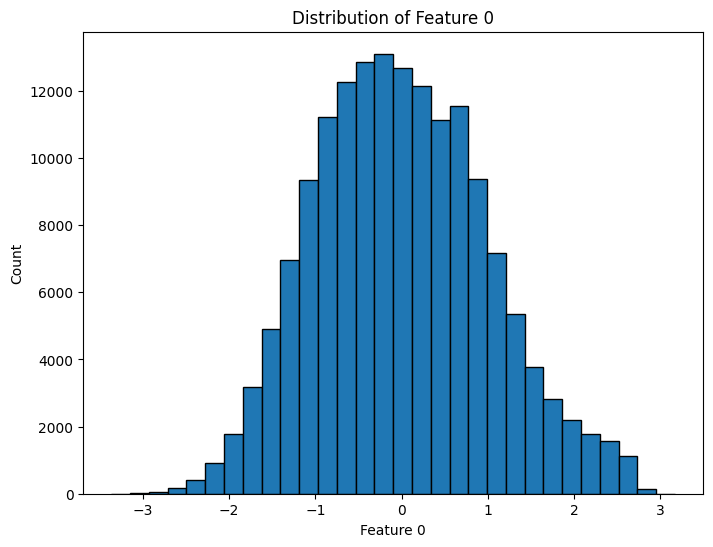

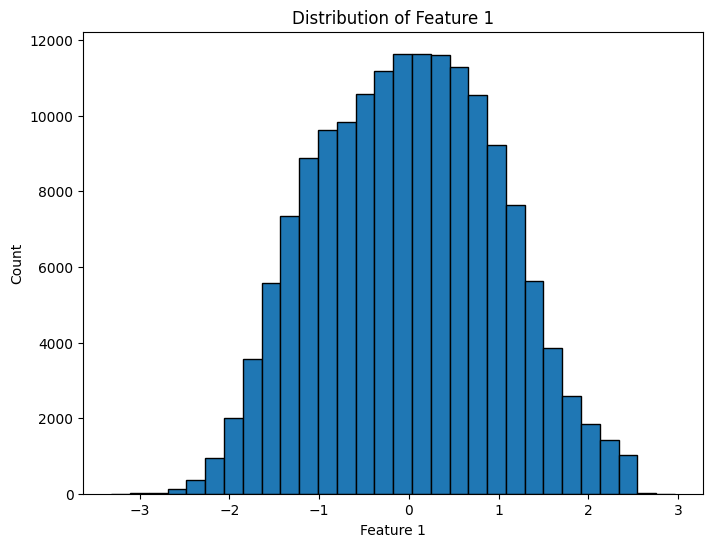

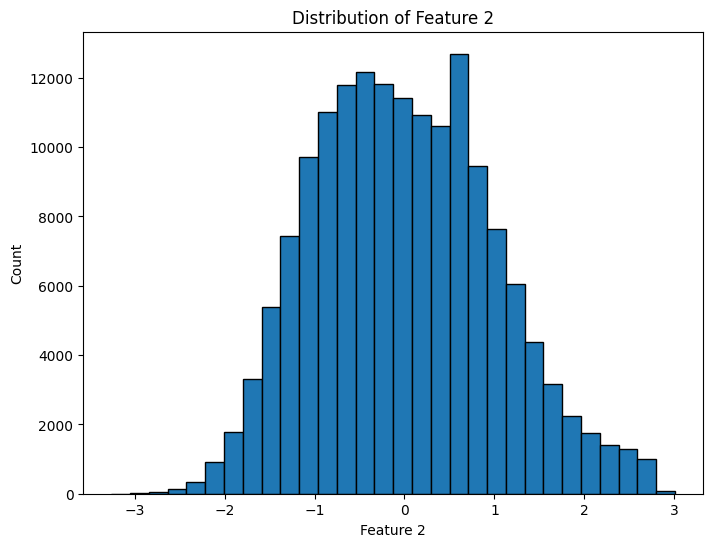

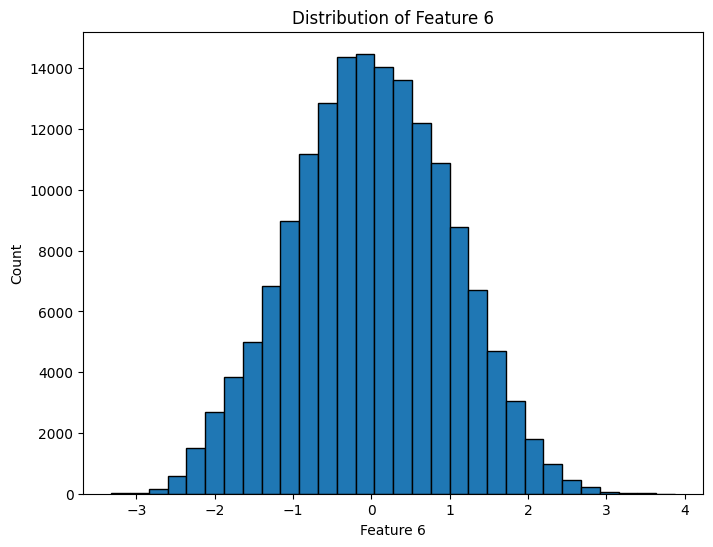

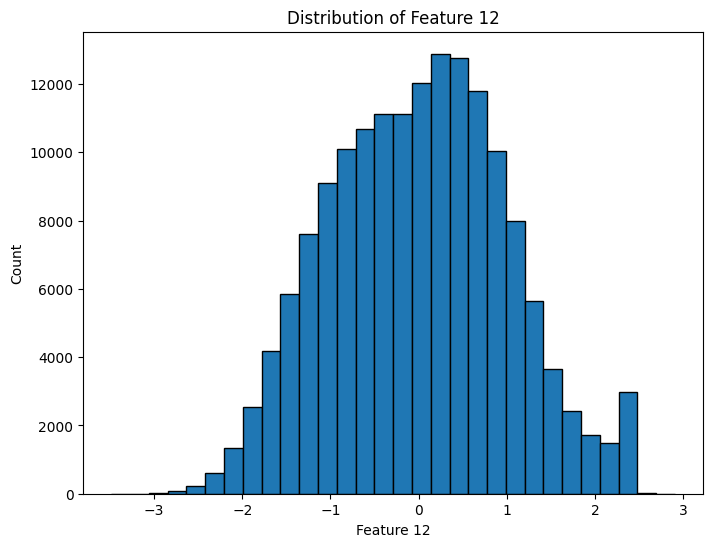

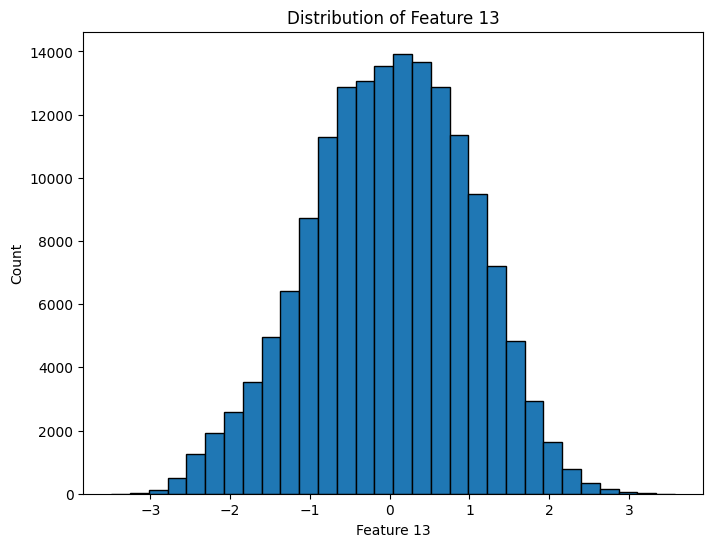

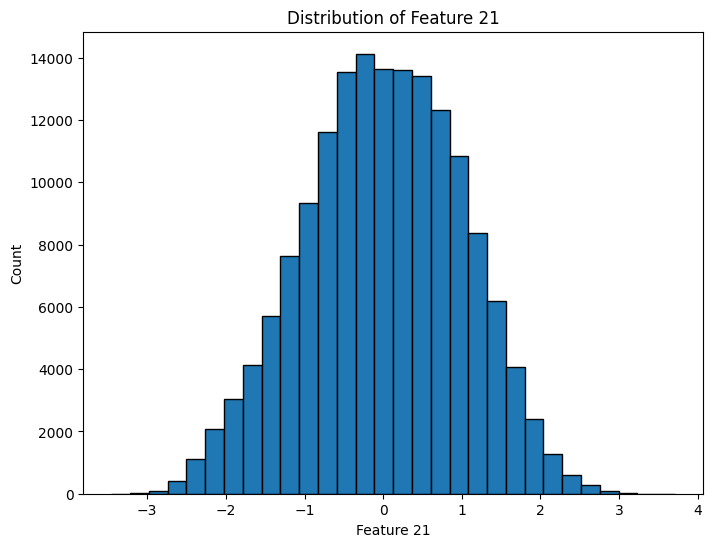

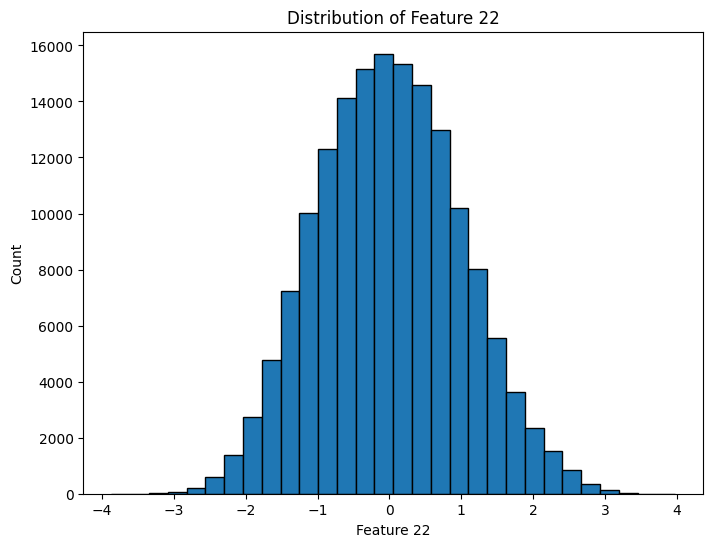

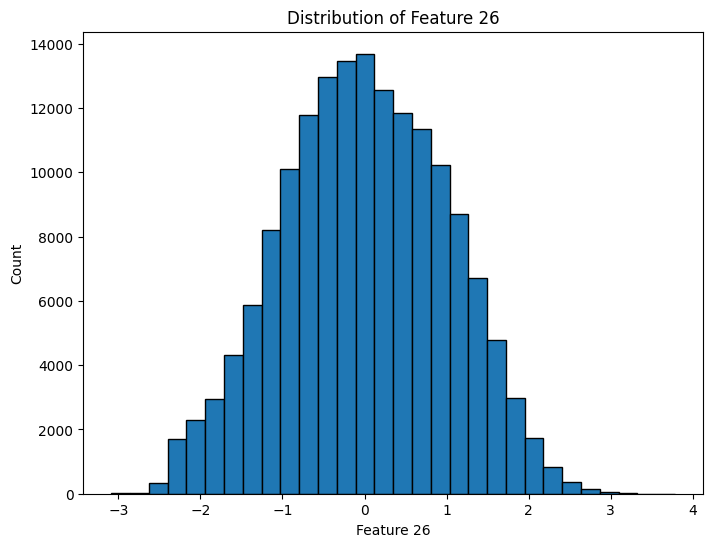

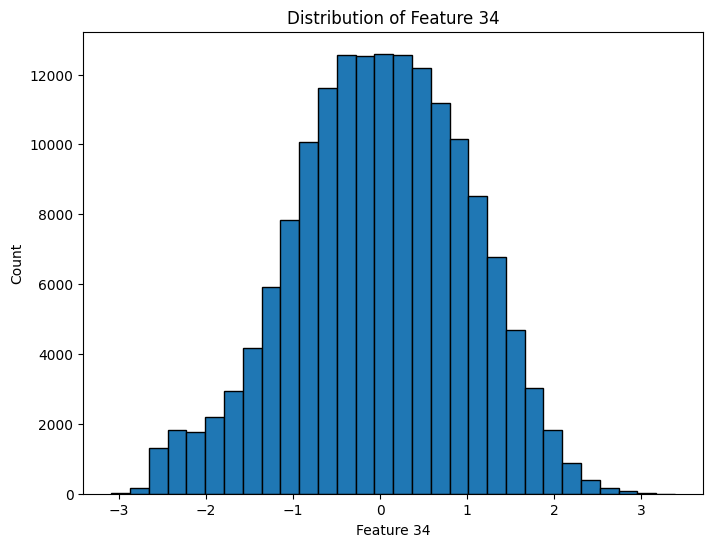

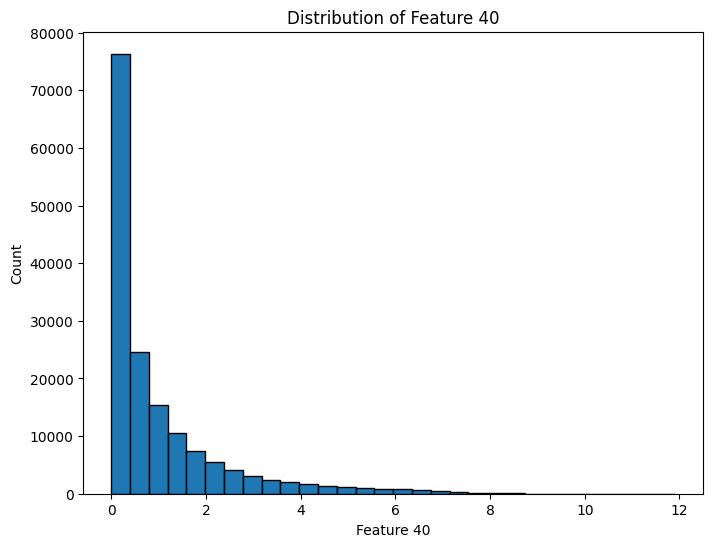

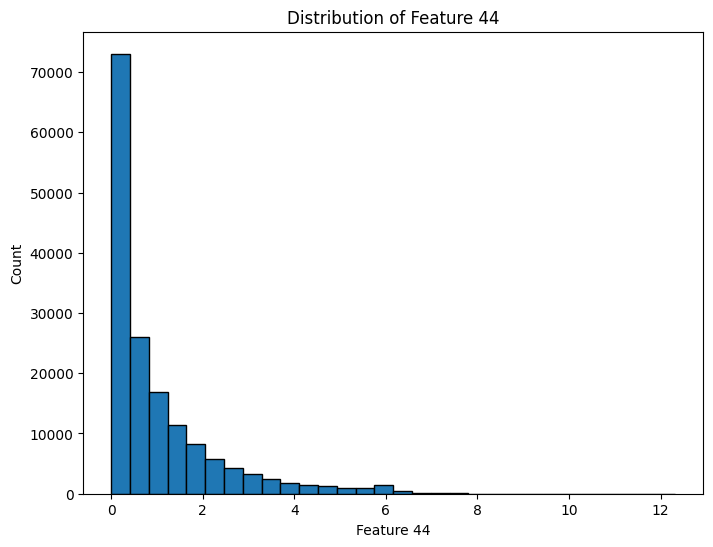

In [14]:
for feature_index in selected_feature_indices:
    if feature_index < selected_features.shape[1]:  # Check if feature_index is within valid bounds
        feature_name = f'Feature {feature_index}'
        plt.figure(figsize=(8, 6))
        plt.hist(selected_features[:, feature_index], bins=30, edgecolor='black')
        plt.xlabel(feature_name)
        plt.ylabel('Count')
        plt.title(f'Distribution of {feature_name}')
        plt.show()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Compare the distribution of selected features between different target classes    </div>


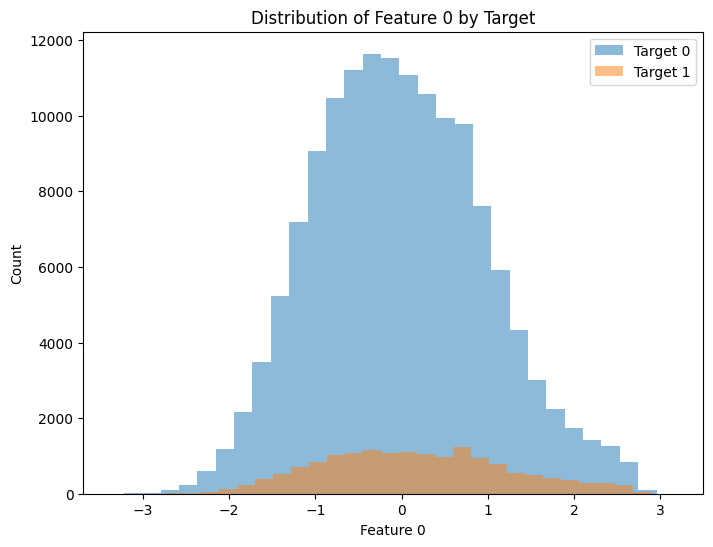

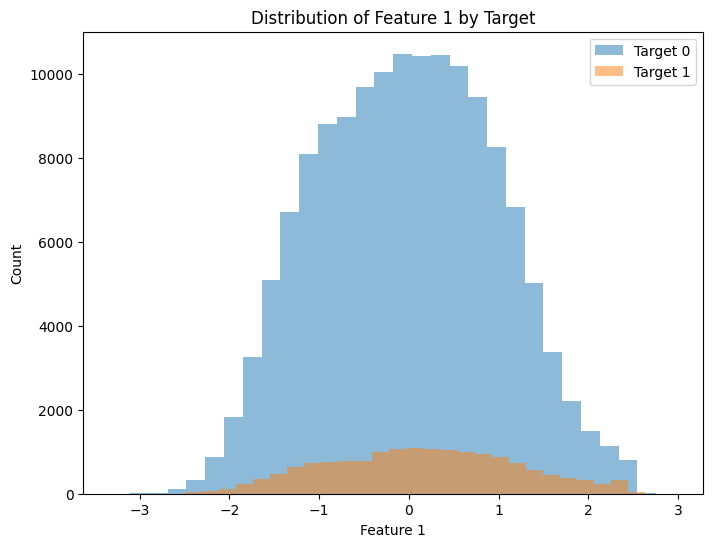

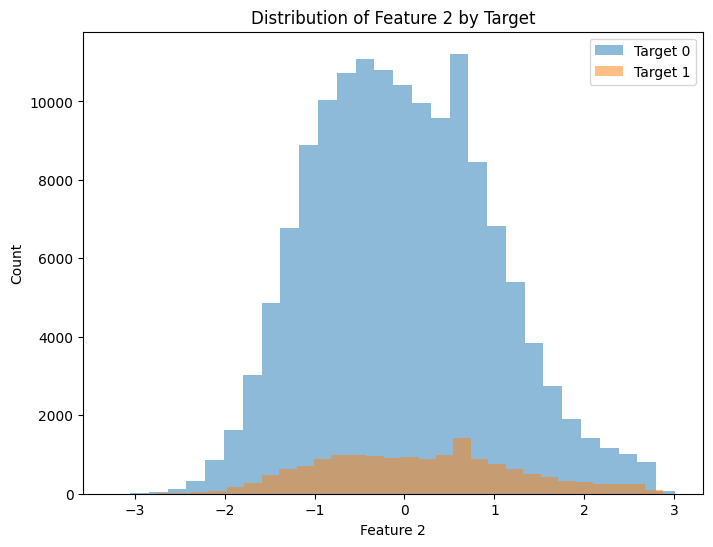

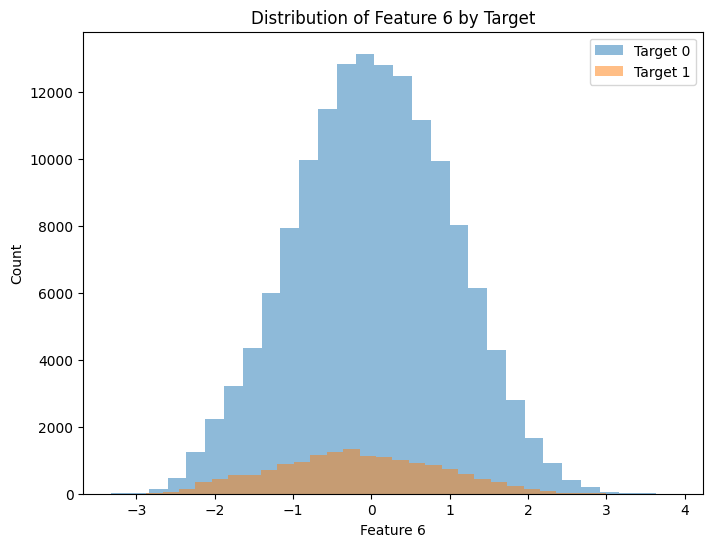

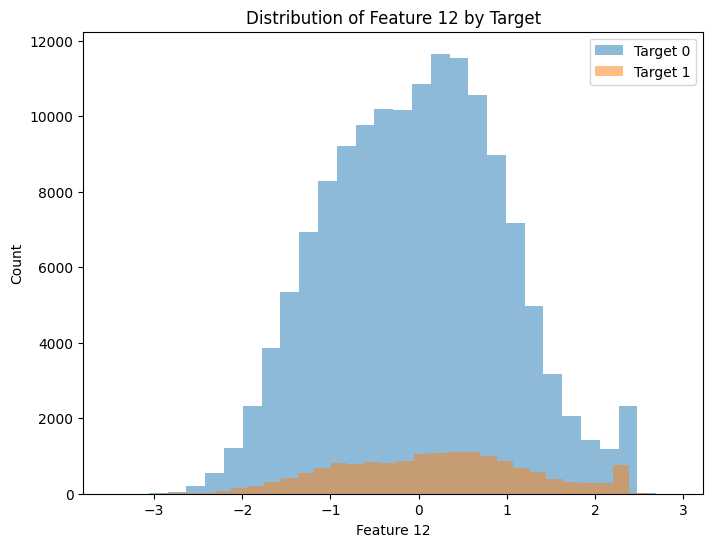

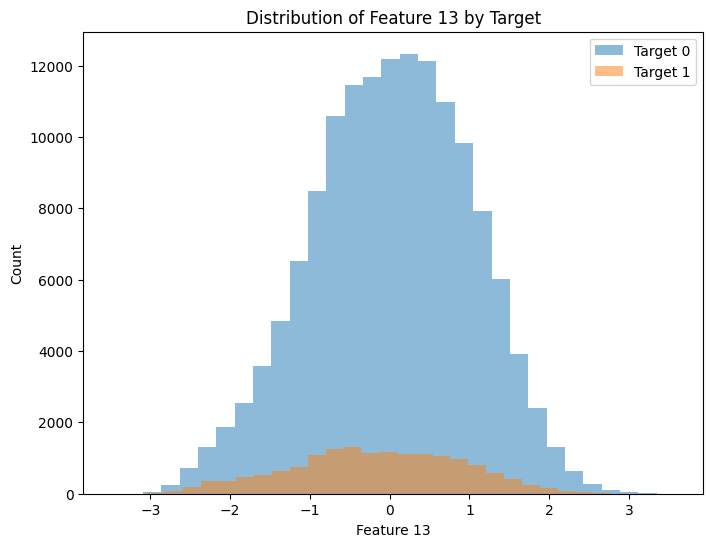

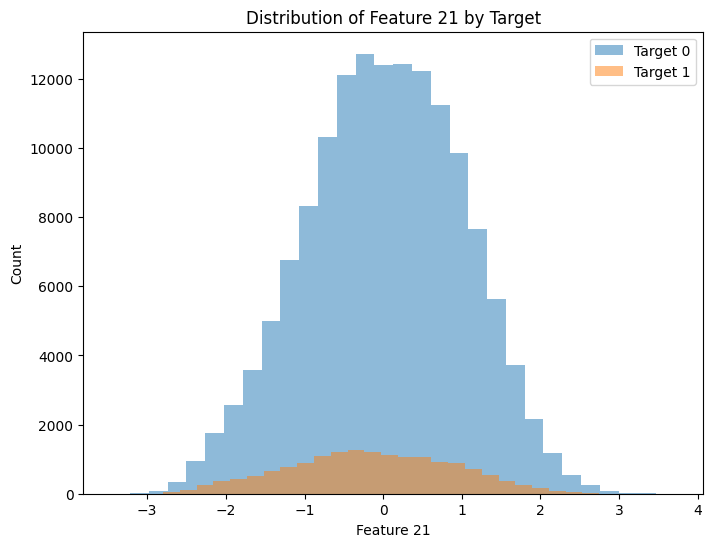

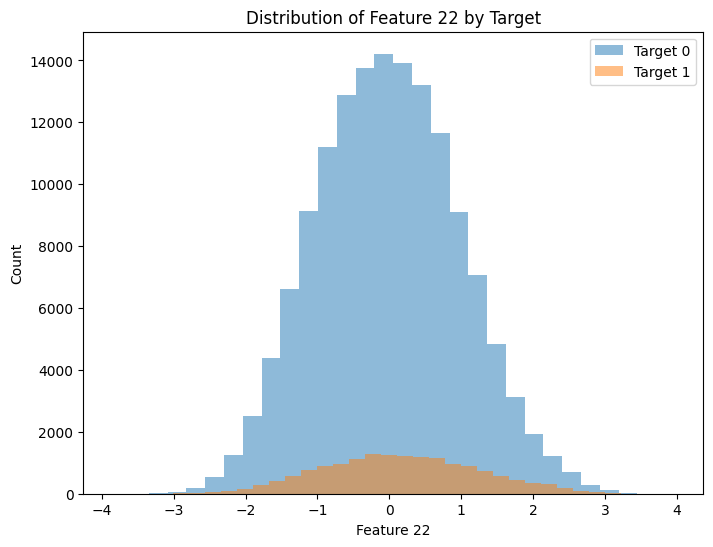

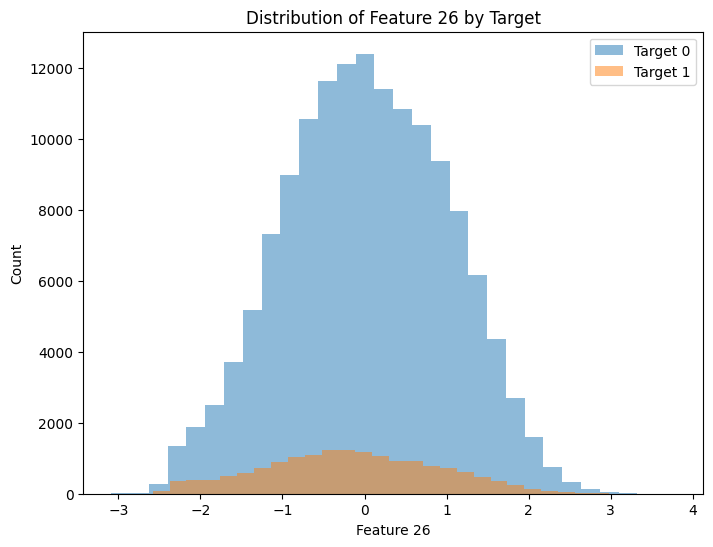

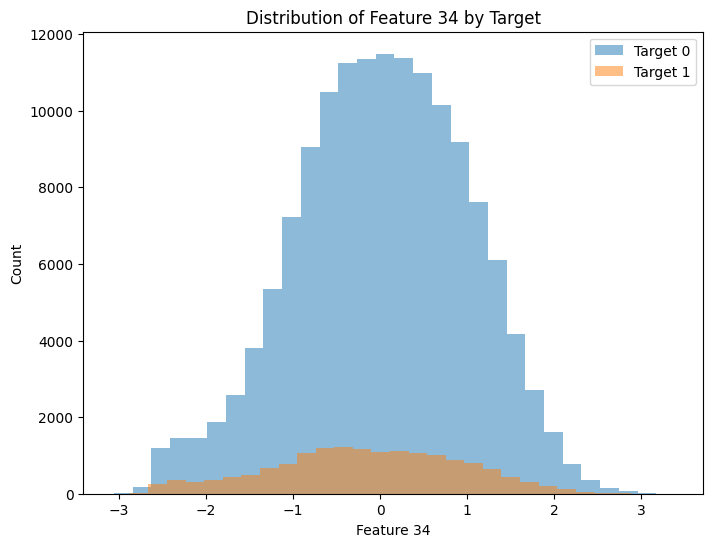

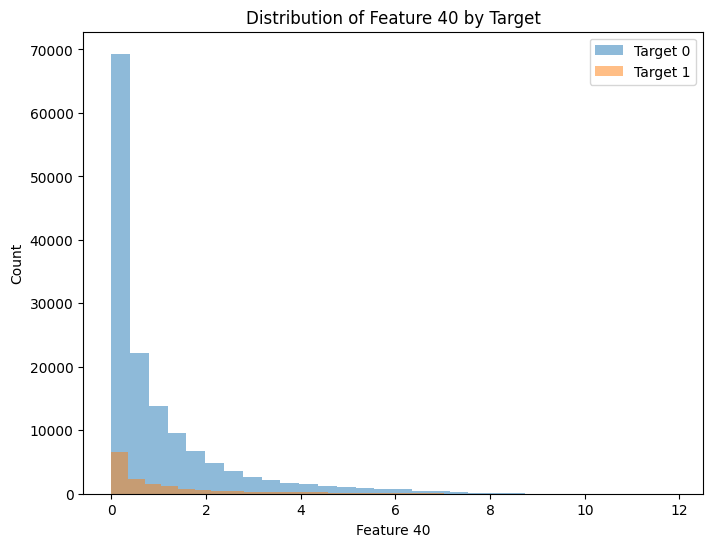

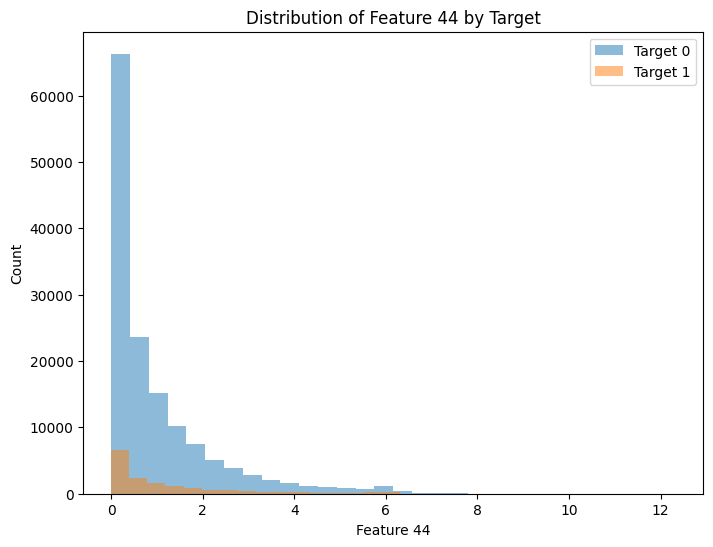

In [15]:
for feature_index in selected_feature_indices:
    if feature_index < selected_features.shape[1]:  # Check if feature_index is within valid bounds
        feature_name = f'Feature {feature_index}'
        plt.figure(figsize=(8, 6))
        plt.hist(selected_features[y_train == 0, feature_index], bins=30, alpha=0.5, label='Target 0')
        plt.hist(selected_features[y_train == 1, feature_index], bins=30, alpha=0.5, label='Target 1')
        plt.xlabel(feature_name)
        plt.ylabel('Count')
        plt.title(f'Distribution of {feature_name} by Target')
        plt.legend()
        plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌

We're not displaying correlation matrix since it won't be meaningful after we have transformed features via polynomial features and selected K best and similarly neither will feature importances and model interpretation make sense</div>

<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 4. Model Selection</div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Initialising the base model and bagging model

In [16]:
base_model = DecisionTreeClassifier()

bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42,n_jobs=-1,verbose=3)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Fitting the bagging model on selected features and evaluating them on val set </div>

In [17]:
bagging_model.fit(X_train_selected, y_train)

# Evaluate the bagging model on the validation set
val_predictions = bagging_model.predict_proba(X_val_selected)[:, 1]  # Predict probabilities for positive class
auc_roc = roc_auc_score(y_val, val_predictions)
print("Validation AUC-ROC:", auc_roc)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   26.7s remaining:  1.0min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:   27.5s remaining:   11.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   29.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished


Validation AUC-ROC: 0.7120767037586039


<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 5. Hyperparameter tuning</div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Tuning the hyperparameters using Optuna </div>

In [18]:
# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameters to search over
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_samples = trial.suggest_float('max_samples', 0.1, 1.0)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)

    # Initialize the base model (e.g., DecisionTreeClassifier) and specify any required hyperparameters
    base_model = DecisionTreeClassifier()

    # Initialize the bagging model with the hyperparameters from Optuna
    bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators, max_samples=max_samples,
                                      max_features=max_features, random_state=42,n_jobs=-1)

    # Fit the bagging model on the selected features
    bagging_model.fit(X_train_selected, y_train)

    # Evaluate the bagging model on the validation set
    val_predictions = bagging_model.predict_proba(X_val_selected)[:, 1]  # Predict probabilities for positive class
    auc_roc = roc_auc_score(y_val, val_predictions)

    return auc_roc

In [19]:
# Define the Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2023-06-28 07:01:23,901] A new study created in memory with name: no-name-d1cbe5b5-2dd4-4ec5-9aba-ec59fd896be6


Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...


[I 2023-06-28 07:01:51,100] Trial 0 finished with value: 0.7697276679602718 and parameters: {'n_estimators': 71, 'max_samples': 0.5217082439177111, 'max_features': 0.8798114846367565}. Best is trial 0 with value: 0.7697276679602718.
[I 2023-06-28 07:02:26,943] Trial 1 finished with value: 0.7709123138321246 and parameters: {'n_estimators': 77, 'max_samples': 0.8861479115293565, 'max_features': 0.8759299369678389}. Best is trial 1 with value: 0.7709123138321246.
[I 2023-06-28 07:02:34,607] Trial 2 finished with value: 0.6372355493343735 and parameters: {'n_estimators': 44, 'max_samples': 0.8728395860841006, 'max_features': 0.13408210637293602}. Best is trial 1 with value: 0.7709123138321246.
[I 2023-06-28 07:02:41,695] Trial 3 finished with value: 0.7318368219263751 and parameters: {'n_estimators': 35, 'max_samples': 0.4196485947346965, 'max_features': 0.3832302501555217}. Best is trial 1 with value: 0.7709123138321246.
[I 2023-06-28 07:02:52,665] Trial 4 finished with value: 0.72879680

In [20]:
# Get the best hyperparameters and train the final bagging model
best_params = study.best_params
best_n_estimators = best_params['n_estimators']
best_max_samples = best_params['max_samples']
best_max_features = best_params['max_features']


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Fitting the base model with best params</div>

In [21]:
final_base_model = DecisionTreeClassifier()

final_bagging_model = BaggingClassifier(final_base_model, n_estimators=best_n_estimators,
                                        max_samples=best_max_samples, max_features=best_max_features,
                                        random_state=42,n_jobs=-1,verbose=3)

# Fit the final bagging model on the selected features
final_bagging_model.fit(X_train_selected, y_train)


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   4 out of  96 | elapsed:   18.9s remaining:  7.3min
[Parallel(n_jobs=96)]: Done  37 out of  96 | elapsed:   20.6s remaining:   32.8s
[Parallel(n_jobs=96)]: Done  70 out of  96 | elapsed:   21.5s remaining:    8.0s
[Parallel(n_jobs=96)]: Done  96 out of  96 | elapsed:   32.6s finished


BaggingClassifier(estimator=DecisionTreeClassifier(),
                  max_features=0.8729854365037194,
                  max_samples=0.4508725885103146, n_estimators=100, n_jobs=-1,
                  random_state=42, verbose=3)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Evaluating the best model on val set </div>

In [22]:
val_predictions = final_bagging_model.predict_proba(X_val_selected)[:, 1]  # Predict probabilities for positive class
auc_roc = roc_auc_score(y_val, val_predictions)
print("Validation AUC-ROC:", auc_roc)

[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   4 out of  96 | elapsed:    0.1s remaining:    1.9s
[Parallel(n_jobs=96)]: Done  37 out of  96 | elapsed:    0.2s remaining:    0.3s


Validation AUC-ROC: 0.779429795620425


[Parallel(n_jobs=96)]: Done  70 out of  96 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=96)]: Done  96 out of  96 | elapsed:    0.4s finished


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Validation AUC-ROC significantly increased </div>

<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 6. Generating Predictions</div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Making predictions on the test data using final bagging model

In [23]:
test_predictions = final_bagging_model.predict_proba(test_df_selected)[:, 1]  # Predict probabilities for positive class


[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   4 out of  96 | elapsed:    0.4s remaining:   10.3s
[Parallel(n_jobs=96)]: Done  37 out of  96 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=96)]: Done  70 out of  96 | elapsed:    0.9s remaining:    0.4s
[Parallel(n_jobs=96)]: Done  96 out of  96 | elapsed:    1.1s finished


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Generating submission after creating submission dataframe and writing it to CSV file</div>

In [24]:
submission_df = pd.DataFrame({'ID_code': test_df['ID_code'], 'target': test_predictions})


In [25]:
submission_df.to_csv('submission.csv', index=False)

In [26]:
submission_df

,ID_code,target
0,test_0,0.19
1,test_1,0.05
2,test_2,0.16
3,test_3,0.01
4,test_4,0.06
...,...,...
199995,test_199995,0.04
199996,test_199996,0.00
199997,test_199997,0.02
199998,test_199998,0.17
